In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from Preprocessing import Preprocessing

In [15]:
df_3600_healthy = pd.read_csv('../data/3600rpm_5kw_healthy_0.2s_0.05ms.csv')
df_3600_1turn_1rf = pd.read_csv('../data/3600rpm_5kw_1turn_1rf_0.2s_0.05ms.csv')
df_3600_1turn_001rf = pd.read_csv('../data/3600rpm_5kW_1turn_0.01rf_0.2s_0.05ms.csv')
df_3600_5turn_1rf = pd.read_csv('../data/3600rpm_5kw_5turns_1rf_0.2s_0.05ms.csv')
df_3600_5turn_001rf = pd.read_csv('../data/3600rpm_5kw_5turns_0.01rf_0.2s_0.05ms.csv')

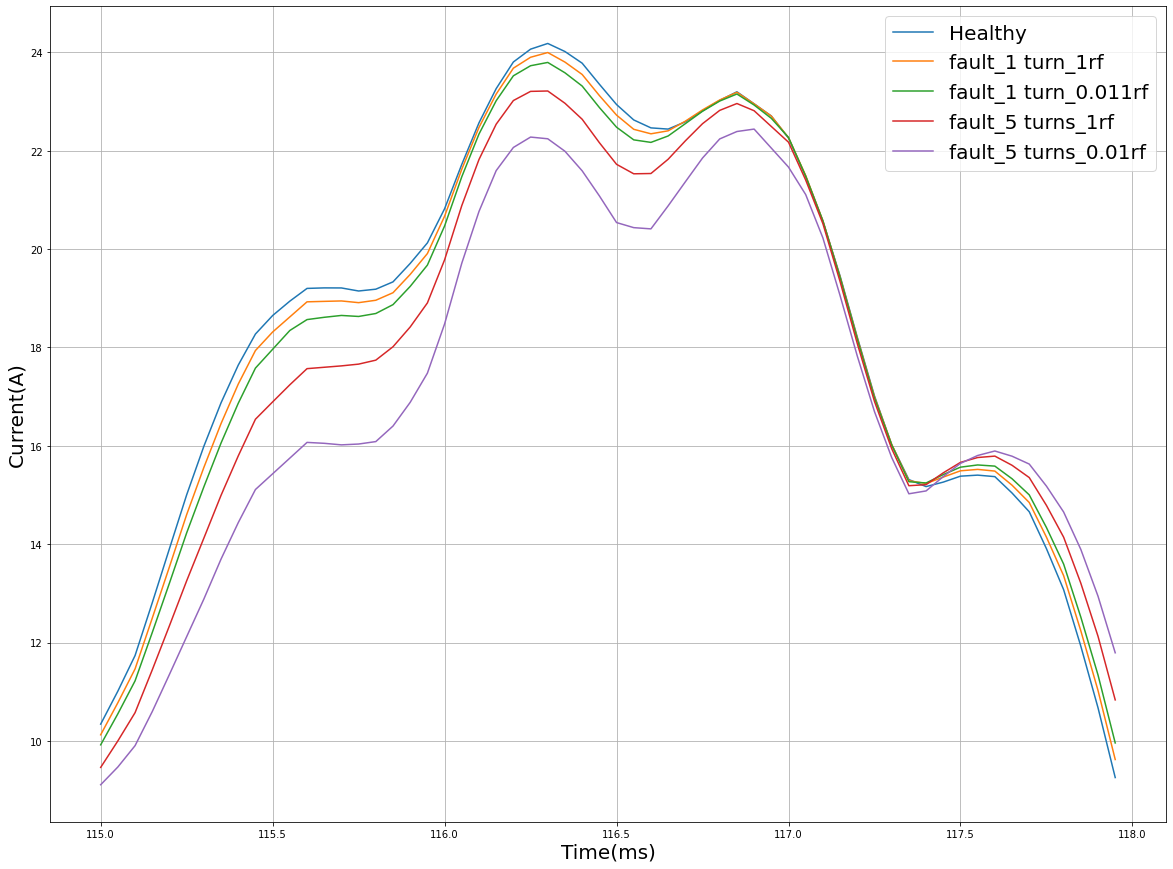

In [51]:
start = 2300
interval = 60
plt.figure(figsize=(20, 15))
plt.xlabel("Time(ms)", fontsize=20)
plt.ylabel('Current(A)', fontsize=20)
x_time = df_3600_healthy.iloc[start: start+interval]['Time [ms]']
plt.plot(x_time, df_3600_healthy.iloc[start: start+interval]['Current(PhaseA) [A]'], label='Healthy')
plt.plot(x_time, df_3600_1turn_1rf.iloc[start: start+interval]['Current(PhaseA) [A]'], label='fault_1 turn_1rf')
plt.plot(x_time, df_3600_1turn_001rf.iloc[start: start+interval]['Current(PhaseA) [A]'], label='fault_1 turn_0.011rf')
plt.plot(x_time, df_3600_5turn_1rf.iloc[start: start+interval]['Current(PhaseA) [A]'], label='fault_5 turns_1rf')
plt.plot(x_time, df_3600_5turn_001rf.iloc[start: start+interval]['Current(PhaseA) [A]'], label='fault_5 turns_0.01rf')
plt.legend(fontsize=20)
plt.grid(True)


In [8]:
preprocessed_healthy = Preprocessing(df_3600_healthy, 3600)
preprocessed_1turn_1rf = Preprocessing(df_3600_1turn_1rf, 3600)
preprocessed_1turn = Preprocessing(df_3600_1turn_001rf, 3600)
preprocessed_5turns_1rf = Preprocessing(df_3600_5turn_1rf, 3600)
preprocessed_5turns = Preprocessing(df_3600_5turn_001rf, 3600)

In [9]:
preprocessed_healthy.dataset
preprocessed_healthy.fundamental_total_sample_period(0.05)
preprocessed_healthy.nsc_augment()

preprocessed_1turn_1rf.dataset
preprocessed_1turn_1rf.fundamental_total_sample_period(0.05)
preprocessed_1turn_1rf.nsc_augment()

preprocessed_1turn.dataset
preprocessed_1turn.fundamental_total_sample_period(0.05)
preprocessed_1turn.nsc_augment()

preprocessed_5turns_1rf.dataset
preprocessed_5turns_1rf.fundamental_total_sample_period(0.05)
preprocessed_5turns_1rf.nsc_augment()

preprocessed_5turns.dataset
preprocessed_5turns.fundamental_total_sample_period(0.05)
preprocessed_5turns.nsc_augment()

d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(A)'] = 0
d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(B)'] = 0
d:\Programing\Python

,Time [ms],Current(PhaseA) [A],Current(PhaseB) [A],Current(PhaseC) [A],NSC
682,34.10,15.182528,6.321899,-21.504427,1.155877
683,34.15,15.463631,6.982874,-22.446505,1.155877
684,34.20,15.684576,7.572269,-23.256845,1.155877
685,34.25,15.776784,8.079208,-23.855993,1.155877
686,34.30,15.755930,8.533984,-24.289914,1.155877
...,...,...,...,...,...
3997,199.85,20.488022,-9.431173,-11.056848,1.023628
3998,199.90,20.411687,-8.244157,-12.167530,1.023628
3999,199.95,20.568707,-7.208271,-13.360436,1.023628
4000,200.00,21.038614,-6.375023,-14.663591,1.023628


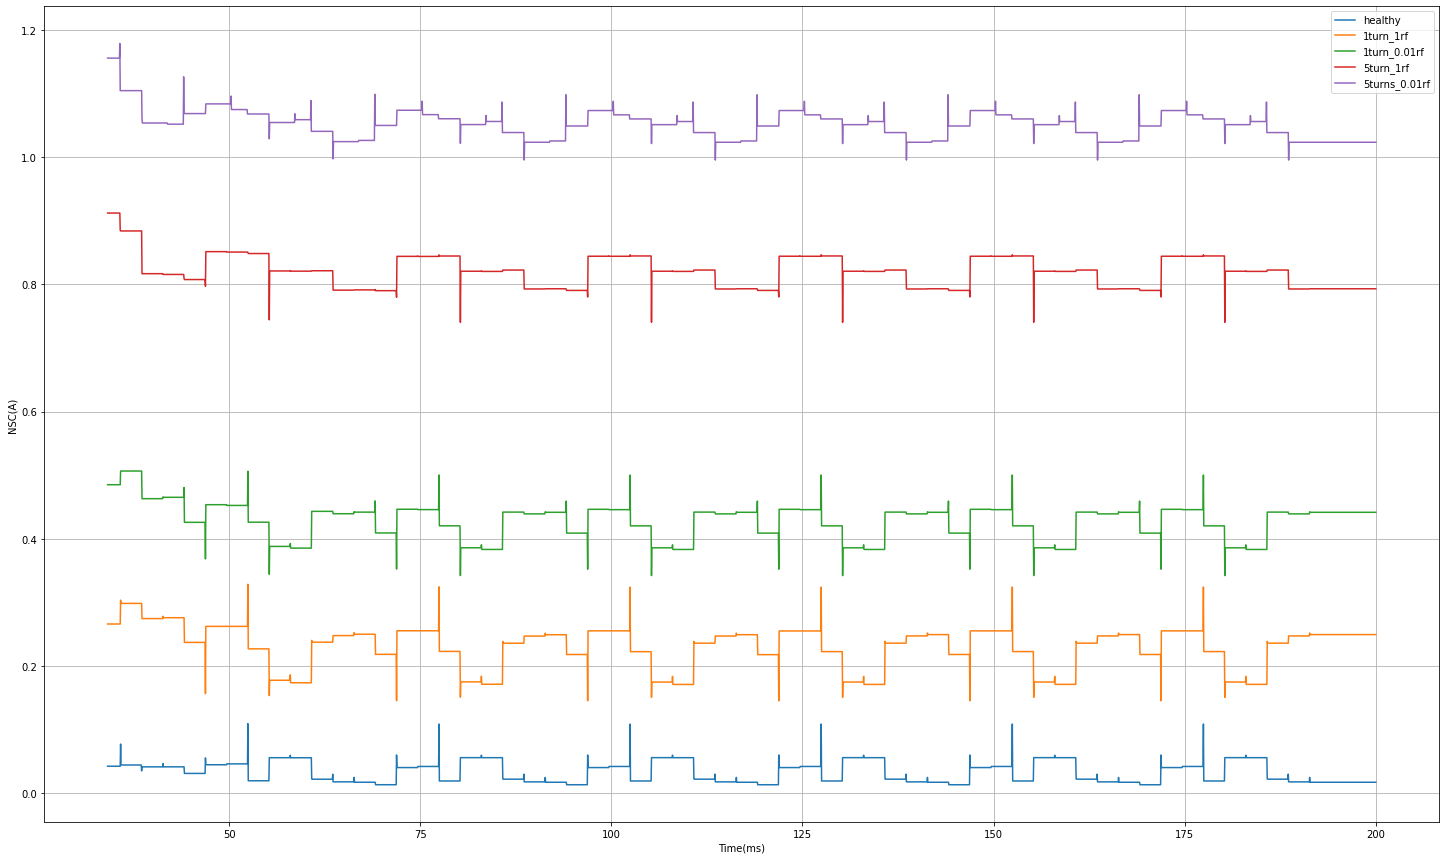

In [12]:
plt.figure(figsize=(25, 15))
plt.xlabel('Time(ms)')
plt.ylabel('NSC(A)')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_healthy.dataset['NSC'], label='healthy')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn_1rf.dataset['NSC'], label='1turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn.dataset['NSC'], label='1turn_0.01rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns_1rf.dataset['NSC'], label='5turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns.dataset['NSC'], label='5turns_0.01rf')
plt.legend()
plt.grid(True)

In [6]:
data1 = preprocessed_healthy.truncate_to_Ns_fundamental(2000, 2166)
data2 = preprocessed_1turn_1rf.truncate_to_Ns_fundamental(2000, 2166)
data3 = preprocessed_1turn.truncate_to_Ns_fundamental(2000, 2166)
data4 = preprocessed_5turns_1rf.truncate_to_Ns_fundamental(2000, 2166)
data5 = preprocessed_5turns.truncate_to_Ns_fundamental(2000, 2166)

x_f, y_f = preprocessed_healthy.dft('Current(PhaseA) [A]', data1)
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseA) [A]',data2)
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseA) [A]', data3)
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseA) [A]', data4)
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseA) [A]', data5)

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

KeyError: '[2088 2163 2043 2073 2157 2147 2072 2149 2152 2137 2122 2075 2053 2140\n 2104 2064 2125 2151 2116 2096 2145 2106 2111 2132 2110 2070 2102 2058\n 2143 2156 2008 2036 2105 2162 2107 2068 2093 2123 2063 2012 2054 2017\n 2101 2013 2029 2042 2150 2009 2010 2127 2092 2080 2005 2084 2046 2055\n 2056 2066 2062 2049 2018 2115 2052 2015 2138 2155 2113 2038 2098 2094\n 2022 2045 2003 2061 2139 2004 2040 2158 2128 2074 2076 2039 2002] not found in axis'

In [ ]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseB) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseB) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseB) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseB) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseB) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

TypeError: dft() missing 1 required positional argument: 'data'

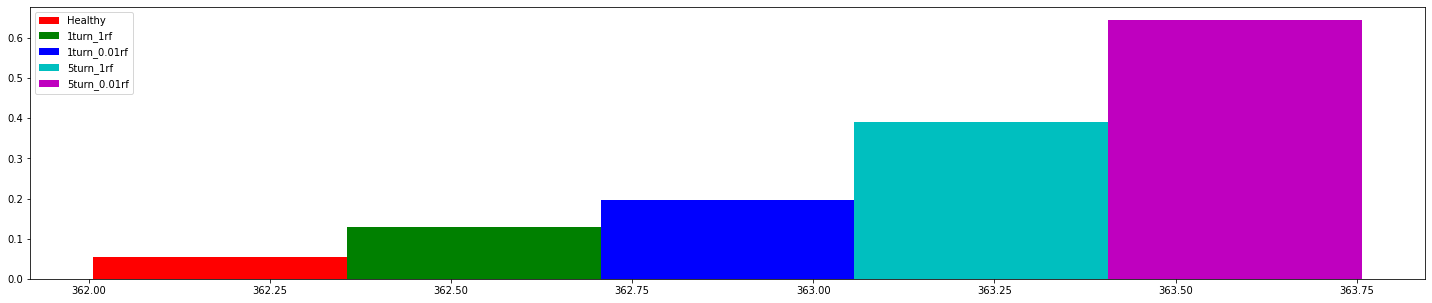

In [ ]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseC) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseC) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseC) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseC) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseC) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

In [ ]:
preprocessed_healthy.Ns

166

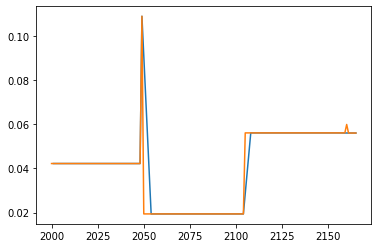

In [ ]:
plt.plot(preprocessed_healthy.truncate_to_Ns_fundamental(2000, 2166).NSC)
plt.plot(preprocessed_healthy.dataset[2000:2166].NSC)

In [ ]:
arr1 = np.array([1, 2, 3])
arr1 + 500

array([501, 502, 503])

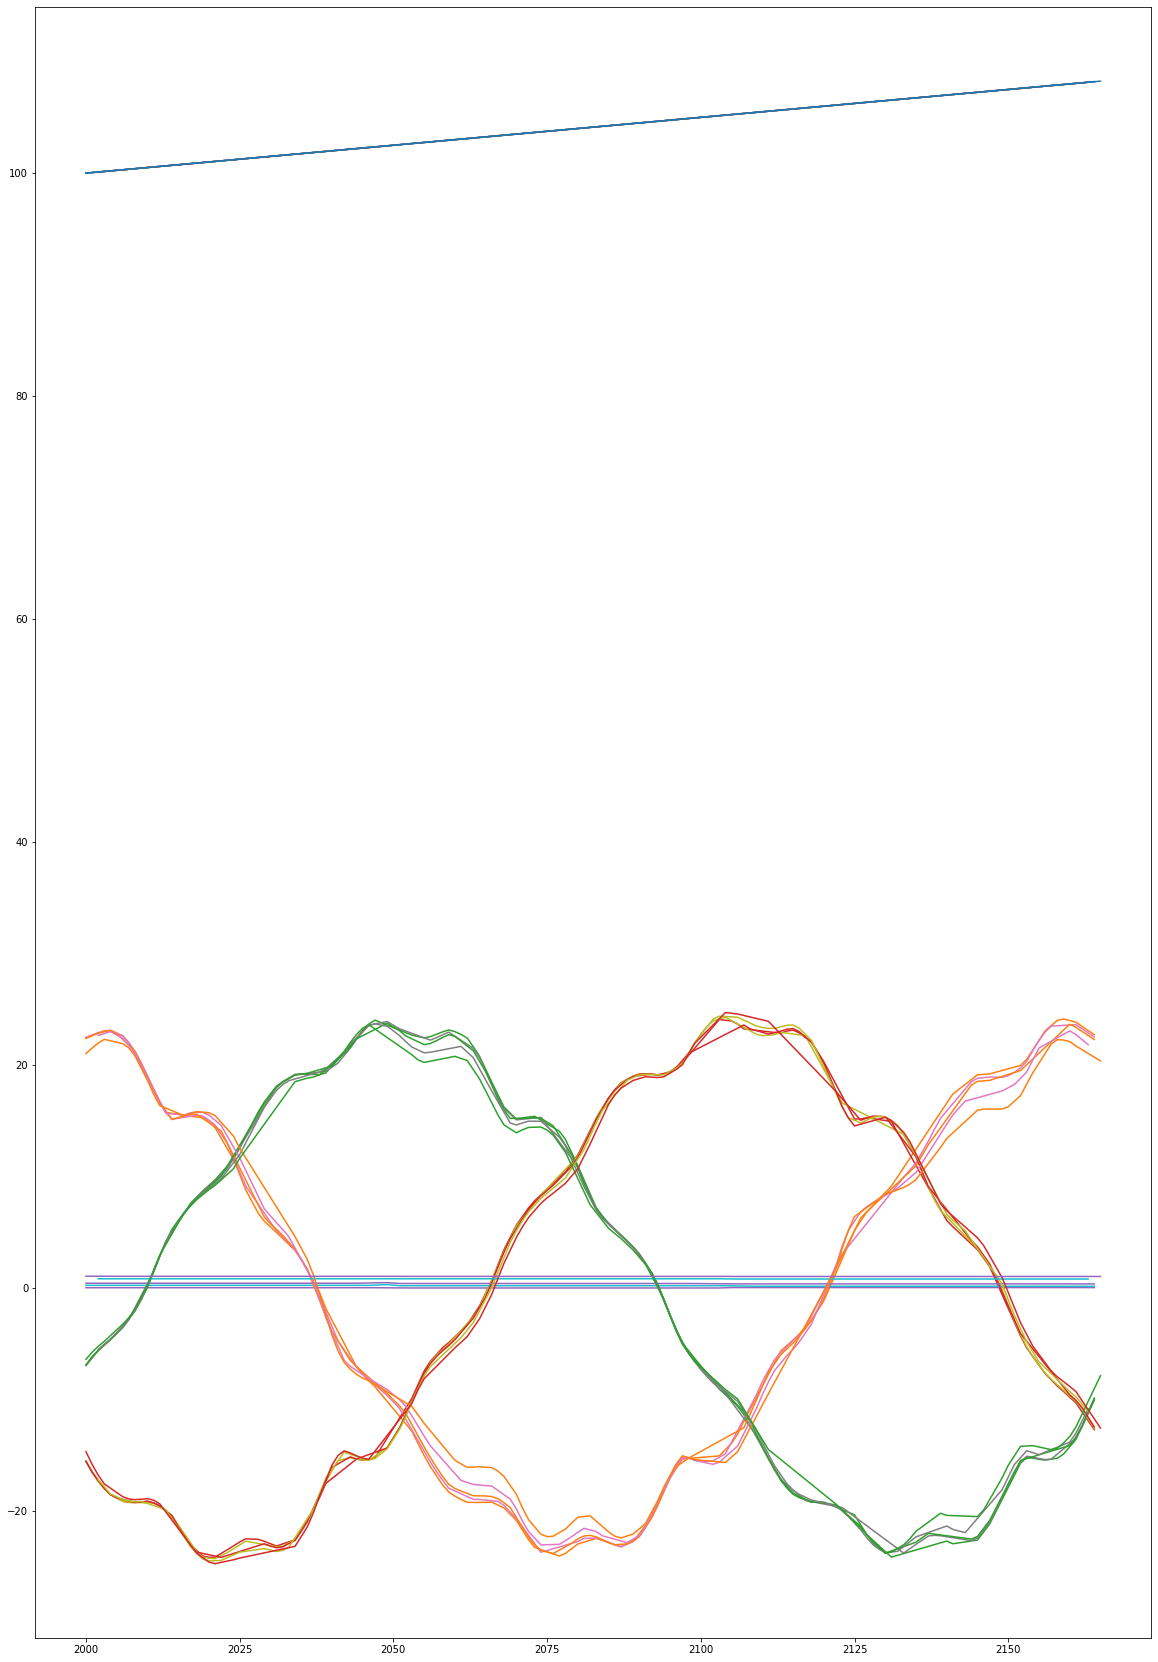

In [ ]:
plt.figure(figsize=(20, 30))
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.plot(data4)
plt.plot(data5)